## Collecting Data Week 4 -- Jan-Tieme Bakema S3243222
since psaw did not work, I used praw which was recommended as an alternative online

The following video was followed as an instruction: https://www.youtube.com/watch?v=Y7BSe7EiBTs

In [5]:
!pip install praw

  Using cached https://files.pythonhosted.org/packages/f4/cd/6a4497bf0a754b13b6f75052fc9672762600d933708e663f0f287bd85407/praw-7.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/88/03/cd5aa2c97356b7eee484a2b63fe850076ecb82fdeda82979a234b62a9a37/websocket_client-1.2.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0c/ba/8dd7fa5f0b1c6a8ac62f8f57f7e794160c1f86f31c6d0fb00f582372a3e4/update_checker-0.18.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d6/36/55cc2cab22aafbebd52ddac4ccb670b920b54eb6ddbdb8573c79ca870d8a/prawcore-2.3.0-py3-none-any.whl


In [1]:
import praw
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords

/Users/jan-tieme/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/jan-tieme/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

In [6]:
# I get the API from my other reddit account, removed the input for security reasons
reddit = praw.Reddit(client_id = "",
                      client_secret = "",
                      user_agent = "",
                      username = "",
                      password = "")

In [24]:
# Retrieves posts from the AMC stock subreddit (looking at r/amcstock)
subred = reddit.subreddit("amcstock")

# looks at top posts over a year and prints out the title, score, number of comments and the upvote ratio of these posts
for i in subred.top('year'):
    print(i.title,';',i.selftext,';',i.score,';',i.num_comments,';', i.upvote_ratio)
    
# This is a quick representation of the data, but won't be useful in this form

AMC YOU IN JAIL, CHEATERS ;  ; 26899 ; 735 ; 0.94
Irony. ;  ; 23859 ; 421 ; 0.95
Still HODLING! Let me know if you are too! 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 ;  ; 21959 ; 3414 ; 0.87
We’re not leaving. We’re coming for you Citadel 😤 ;  ; 21707 ; 1855 ; 0.93
Wall Street got caught in a bad bet. They are trying to scare you into selling. They are throwing a tantrum before being forced to pay up ; The higher the stock price is this week, the more shares Wall Street has to buy. This is a special week, as there are tens of millions they would potentially have to buy. They are doing everything they can to lower the price, and to try to scare investors into selling, so they can try to avoid having to buy those tens of millions of shares.

Furthermore, the media has confirmed naked short selling, validating the AMC 500K thesis, which says AMC can be worth 500K (or more!) during a squeeze.

Apes posted Bloomberg market data which seems to show there are 200,000,000 naked shorts hedges must buy back. T

In [8]:
# Below I transform this data into a dataframe, while also adding some other interesting columns
# I changed it to the 500 most popular posts from the year
df = []
for post in subred.top('year', limit = 500):
    df.append([post.title, post.selftext, post.score, post.num_comments,post.upvote_ratio, 'reddit.com' + post.permalink])
    
df = pd.DataFrame(df,columns=['title', 'body', 'score', 'num_comments', 'upvote_ratio', 'permalink'])    

In [9]:
## a function that retrieves most common words from a list of words
def most_common_words(list_of_words):
    dict_words = {}
    for word in list_of_words:
        if word not in dict_words:
            dict_words[word] = 1
        else:
            dict_words[word] += 1
    return dict_words


In [21]:
# Get all words of the posts with the fifty highest upvote ratios
high_ratio = df.nlargest(50, 'upvote_ratio')
exclude_symbols = '#-*&#x200b;'
high_ratio_words = []
for body in high_ratio['body']:
    for word in body.split():
        if word.lower() not in stopwords.words('english') and word.lower() not in exclude_symbols:
            high_ratio_words.append(word.lower())

# create dict with the word counts
dict_high = most_common_words(high_ratio_words)

#create Series the word counts
df_high = pd.Series(dict_high)

# shows 10 most common words
df_high.nlargest(20)

shares     46
price      41
stock      26
get        25
like       25
short      24
amc        24
money      22
would      21
sell       21
buy        21
go         19
people     19
apes       17
need       17
squeeze    17
back       17
fucking    17
make       16
one        16
dtype: int64

In [23]:
# Get all words of the posts with the fifty lowest upvote ratios
low_ratio = df.nsmallest(50, 'upvote_ratio')
exclude_symbols = '#-*&#x200b;'
low_ratio_words = []
for body in low_ratio['body']:
    for word in body.split():
        if word.lower() not in stopwords.words('english') and word.lower() not in exclude_symbols:
            low_ratio_words.append(word.lower())

# create dict with the word counts
dict_low = most_common_words(low_ratio_words)

#create Series the word counts
df_low = pd.Series(dict_low)

#shows 10 most common words
df_low.nlargest(20)

price      30
dark       19
much       17
us         15
pool       13
amc        12
time       12
shares     12
get        11
i'm        11
would      10
like        9
fucking     8
apes        8
day         8
buy         8
fuck        7
hedge       7
going       7
funds       7
dtype: int64

Interestingly, the lower upvote ratio posts mention  'hedge' which could refer to hedge funds which would make sense since this subreddit was started on January 27th 2021 when investors online invested in so-called 'meme stocks' https://en.wikipedia.org/wiki/Meme_stock in an effort to outsmart hedge funds and making them lose a lot of money.
Additionally the word 'dark' appears in the lower upvote ratio posts as well.

On the other hand, whereas the higher upvote ratio posts mention words like 'squeeze' and 'short'. This could be related to the collective effort to inform each other and unite against these hedge funds by sharing strategies. The whole idea behind this movement is that people hold on to their stocks together, even when its value rises.

Some common themes in both types of posts is the reference to 'apes' which is what the commmunity calls itself.

## Correlation coeffecient

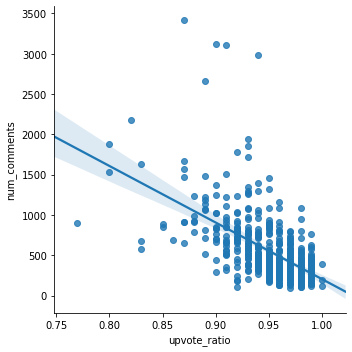

In [25]:
## Is there a correlation between number of comments and the upvote ratio
## Do posts with more comments have a lower upvote ratio?
sns.lmplot(x='upvote_ratio', y='num_comments', data=df);

In [26]:
df['num_comments'].corr(df['upvote_ratio'])

-0.5665184087201591

## Reflection
There does seem to be a correlation between number of comments on a post and the upvote ratio

The negative score does indicate that posts with more comments have a lower upvote ratio, however, most data points seem to be grouped together with around 100-1000 comments, with a relatively high upvote ratio. Whether we can really say anything about the relationship is another point. 

It could be that thread that discusses strategy more in detail (more comments) would not necessarily lead people to upvote the post

Moreover, we could say that 'memes' uploaded on the subreddit could garner a higher proportion of upvotes because it entertains people, while simultaneously leading to less discussion in the comment section.

A third, albeit unlikely, explanation could be that people are more inclined to comment if they do not fully agree with the post, therefore creating more discussion in more 'controversial' posts.
However, a strong criticism of this last point is that the dataset mostly includes posts that are in essence already in the 'top' posts of the year, so it simply looks at the low upvote ratios within a set of relatively highly upvoted posts. 